In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from joblib import dump

# reading the csv data file
historic_gas_data = pd.read_csv("data/gas-prices-day-ahead-con.csv")

# get the number of month into the dataframe
historic_gas_data['Month'] = historic_gas_data.index

# the pre rise data is the data before the russia-ukraine war
pre_rise_data = historic_gas_data[:147]


y = pre_rise_data['Price'].values
x = pre_rise_data['Month'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

price_model = LinearRegression().fit(x, y)

# we are forecasting from 0th month to 360th month (30 years)
t = np.array([x for x in range(0, 12*30+1)])
t = t.reshape(len(t), 1)


In [62]:
price_forecast_deterministic = price_model.predict(
    t) + historic_gas_data['Price'].iat[-1] - price_model.predict(t)[0]


In [75]:
price_forecast = np.zeros(12*30+1) + price_forecast_deterministic[0]
sigma = historic_gas_data['Price'].std()  # Standard deviation.

for i in range(1, 12*30):
    price_forecast[i + 1] = price_forecast_deterministic[i] * \
        1 + (sigma * 1 * np.random.normal(0, 1))


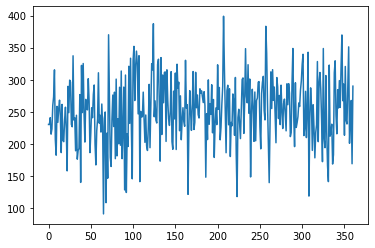

In [76]:
plt.plot(t, price_forecast)

In [77]:
historic_gas_data['Price'].std()


55.086289501934765